In [0]:
#importing the libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential #creating the architecture for the CNN
from keras.layers import Dense, Conv2D, Flatten #creating layers for the model
import numpy as np
import os #to access the data stored in the computer
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Using TensorFlow backend.


In [5]:
import os
import shutil

in_dir = 'Real/'
out_dir = 'Dataset/'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

count=0
for r, d, f in os.walk(in_dir):
    for file in f:
        if 'Right_thumb' not in file:
            continue
        shutil.copy(os.path.join(in_dir, file), os.path.join(out_dir, file))
        count+=1
print(count)

600


In [1]:
from FpSegmentator import FpSegmentator
from FpEnhancer import FpEnhancer
from Binarizer import Binarizer
from Skeletonizer import Skeletonizer
import cv2
from matplotlib import pyplot as plt

(103, 96)


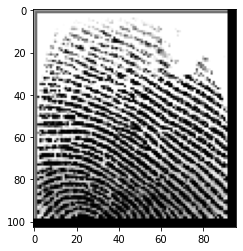

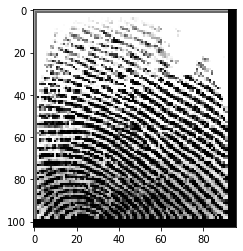

(103, 96)


In [32]:
img = cv2.imread("Dataset/1__M_Right_thumb_finger.BMP", cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, 'gray')
plt.show()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

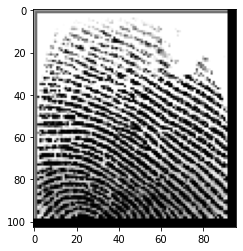

In [14]:
img = cv2.imread("Dataset/1__M_Right_thumb_finger.BMP", cv2.IMREAD_GRAYSCALE)
segmentator = FpSegmentator(15,150)
img = segmentator.segment(img)
plt.imshow(img, cmap="gray")

In [ ]:
enhancer = FpEnhancer(10)
enhImg = enhancer.enhance(img, np.ones(img.shape) * 255)
imshow( enhImg,"Enhanced Image")

In [ ]:
binarizer = Binarizer()
binImg = binarizer.binarize(enhImg)
imshow( binImg,"Binary Image")
sk = Skeletonizer()
skImg = sk.skeletonize(binImg)
imshow( skImg,"Skeleton Image")

In [0]:
#loading the dataset from Google Drive
from google.colab import drive
drive .mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Designing compiling the CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(300,300,3))) #input layer
model.add(Conv2D(32, kernel_size=3, activation='relu')) #this is a convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu')) #this is another convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu')) #this is another convolution layer
model.add(Flatten()) #converts into 1-D array i.e. flattens
model.add(Dense(1,activation='sigmoid')) #1 neurons. 2 diferent labels (Fake or Live)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #compiling the  model







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_datagen=ImageDataGenerator(rescale=-1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)
train_set=train_datagen.flow_from_directory("/content/drive/My Drive/MODEL1/Train",target_size=(300,300),batch_size=16,class_mode='binary')
test_set=test_datagen.flow_from_directory("/content/drive/My Drive/MODEL1/Test",target_size=(300,300),batch_size=16,class_mode='binary')

Found 5660 images belonging to 2 classes.
Found 7958 images belonging to 2 classes.


In [0]:
#Fitting the model
model.fit_generator(train_set,steps_per_epoch=25,epochs=3,validation_data=test_set,validation_steps=2)
model.save_weights('hi.h5')  # to save weights after training




Epoch 1/3





25/25 [==============================] - 399s 16s/step - loss: 6.3410 - acc: 0.5808 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 2/3
25/25 [==============================] - 390s 16s/step - loss: 6.3666 - acc: 0.6050 - val_loss: 9.0664 - val_acc: 0.4375
Epoch 3/3
25/25 [==============================] - 390s 16s/step - loss: 6.3264 - acc: 0.6075 - val_loss: 10.0738 - val_acc: 0.3750
